About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

Business Problem:

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df=pd.read_csv('/content/walmart_data.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
150250,1005196,P00136942,M,55+,7,C,4+,1,5,5312
150251,1005197,P00327642,F,55+,3,C,3,1,18,3010
150252,1005197,P00323542,F,55+,3,C,3,1,8,9700
150253,1005197,P00282442,F,55+,3,C,3,1,5,5299


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
#converting int to object

columns=['User_ID','Occupation', 'Marital_Status', 'Product_Category']
df[columns]=df[columns].astype('object')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
350610,1006010,P00058642,M,36-45,0.0,C,1,0.0,18.0,3146.0
350611,1006010,P00148742,M,36-45,0.0,C,1,0.0,8.0,7975.0
350612,1006011,P0097242,M,36-45,15.0,C,3,0.0,1.0,19547.0
350613,1006011,P00182742,M,36-45,15.0,C,3,0.0,1.0,11579.0


In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
#counting values by categories

Age=df['Age'].value_counts().sort_values(ascending=False)
Gender=df['Gender'].value_counts().sort_values(ascending=False)
Occupation=df['Occupation'].value_counts().sort_values(ascending=False)
Marital_Status=df['Marital_Status'].value_counts().sort_values(ascending=False)
Product_Category=df['Product_Category'].value_counts().sort_values(ascending=False)
Product_Id=df['Product_ID'].value_counts().sort_values(ascending=False)
print("Age=",Age)
print("Gender=",Gender)
print("Occupation=",Occupation)
print("Marital_Status=",Marital_Status)
print("Product_Category=",Product_Category)
print("Product_Id=",Product_Id)


Age= Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Gender= Gender
M    414259
F    135809
Name: count, dtype: int64
Occupation= Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
Marital_Status= Marital_Status
0    324731
1    225337
Name: count, dtype: int64
Product_Category= Product_Category
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: count, dtype: int64
Product_Id= Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P0011214

In [ ]:
#counting unique values

unique_age=df['Age'].unique()
gender=df['Gender'].unique()
unique_occupation=df['Occupation'].unique()
Marital_status=df['Marital_Status'].unique()
Unique_Product_Category=df['Product_Category'].unique()
print("unique_age=",unique_age)
print("gender=",gender)
print("unique_occupation=",unique_occupation)
print("Marital_status=",Marital_status)
print("Unique_Product_Category=",Unique_Product_Category)

unique_age= ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
gender= ['F' 'M']
unique_occupation= [10 16 15 7 20 9 1 12 17 0 3 4 11 8 19 2 18 5 14 13 6]
Marital_status= [0 1]
Unique_Product_Category= [3 1 12 8 5 4 2 6 14 11 13 15 7 16 18 10 17 9 20 19]


In [ ]:
len(df)

550068

Basic Observations :

> There are no missing Values in the data

> There are 3631 unique product IDs in the dataset. P00265242 is the most sold Product ID.

>There are 7 unique age groups.

> The most product sold is amongst the age group of 26-30

> The spread between men and women are 414259 and
  135809, the difference is significant in terms of buying the product.

> Unmarried customers tend to buy more products than married.

> The product category which is sold the most is P00265242.

> There are 20 unique product categories with 5 being the highest.

In [ ]:
pd.crosstab(df['Age'],df['Gender'],margins=True)

Gender,F,M,All
Age,,,
0-17,5083,10019,15102
18-25,24628,75032,99660
26-35,50752,168835,219587
36-45,27170,82843,110013
46-50,13199,32502,45701
51-55,9894,28607,38501
55+,5083,16421,21504
All,135809,414259,550068


In [ ]:
pd.crosstab(df['Age'],df['Gender'],margins=True,normalize='index')

Gender,F,M
Age,,
0-17,0.336578,0.663422
18-25,0.247120,0.752880
26-35,0.231125,0.768875
36-45,0.246971,0.753029
46-50,0.288812,0.711188
51-55,0.256980,0.743020
55+,0.236375,0.763625
All,0.246895,0.753105


In [ ]:
pd.crosstab(df['Marital_Status'],df['Gender'],margins=True)

Gender,F,M,All
Marital_Status,,,
0,78821,245910,324731
1,56988,168349,225337
All,135809,414259,550068


In [ ]:
pd.crosstab(df['Marital_Status'],df['Gender'],margins=True,normalize='index')

Gender,F,M
Marital_Status,,
0,0.242727,0.757273
1,0.252901,0.747099
All,0.246895,0.753105


In [ ]:
pd.crosstab(df['Occupation'],df['Gender'],margins=True)

Gender,F,M,All
Occupation,,,
0,18112,51526,69638
1,17984,29442,47426
2,8629,17959,26588
3,7919,9731,17650
4,17836,54472,72308
5,2220,9957,12177
6,8160,12195,20355
7,10028,49105,59133
8,361,1185,1546


In [ ]:
pd.crosstab(df['Occupation'],df['Gender'],margins=True,normalize='index')

Gender,F,M
Occupation,,
0,0.260088,0.739912
1,0.379201,0.620799
2,0.324545,0.675455
3,0.448669,0.551331
4,0.246667,0.753333
5,0.182311,0.817689
6,0.400884,0.599116
7,0.169584,0.830416
8,0.233506,0.766494


In [ ]:
pd.crosstab(df['Product_Category'],df['Gender'],margins=True)

Gender,F,M,All
Product_Category,,,
1,24831,115547,140378
2,5658,18206,23864
3,6006,14207,20213
4,3639,8114,11753
5,41961,108972,150933
6,4559,15907,20466
7,943,2778,3721
8,33558,80367,113925
9,70,340,410


In [ ]:
pd.crosstab(df['Product_Category'],df['Gender'],margins=True,normalize='index')

Gender,F,M
Product_Category,,
1,0.176887,0.823113
2,0.237094,0.762906
3,0.297136,0.702864
4,0.309623,0.690377
5,0.278011,0.721989
6,0.222760,0.777240
7,0.253426,0.746574
8,0.294562,0.705438
9,0.170732,0.829268


> Only 25% women purchase the product, remaining being men.

> Amongst married and unmarried, the distribution of gender is same as overall.

>  In the overall occupation, men are dominating at around 75%, the most number of women is in occupation 9 which is around 92%.

>

In [ ]:
##Checking how the data is spread basis distinct users

df2=df.groupby(['User_ID'])['Age'].unique()
df2.value_counts()/len(df2)*100

Age
[26-35]    34.849771
[36-45]    19.809879
[18-25]    18.146325
[46-50]     9.013750
[51-55]     8.164997
[55+]       6.314717
[0-17]      3.700560
Name: count, dtype: float64

> Customers of age [26-35] covers 35% of market.

In [ ]:
df1=df.groupby(['User_ID'])['Occupation'].unique()
df1.value_counts()/len(df1)*100

Occupation
[4]     12.561535
[0]     11.678832
[7]     11.356306
[1]      8.776099
[17]     8.334748
[12]     6.382618
[14]     4.990664
[20]     4.634188
[2]      4.345612
[16]     3.989136
[6]      3.870311
[10]     3.259209
[3]      2.885758
[15]     2.376507
[13]     2.376507
[11]     2.172806
[5]      1.884230
[9]      1.493804
[19]     1.205228
[18]     1.137328
[8]      0.288576
Name: count, dtype: float64

Occupation 4 covers 12% of customers.

In [ ]:
df3=df.groupby(['User_ID'])['Marital_Status'].unique()
df3.value_counts()/len(df3)*100

Marital_Status
[0]    58.003735
[1]    41.996265
Name: count, dtype: float64

>  We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [ ]:
df4=df.groupby(['User_ID'])['Product_Category'].unique()
df4.value_counts()/len(df4)*100

Product_Category
[1]                                                             0.050925
[3, 1, 12, 2, 4, 5, 8, 6, 14, 16, 20]                           0.016975
[5, 3, 1, 4, 8, 2, 11, 13, 6, 10, 7, 16, 20]                    0.016975
[1, 11, 3, 5, 8, 4, 16, 2, 19]                                  0.016975
[5, 3, 11, 1, 20]                                               0.016975
                                                                  ...   
[1, 8, 6, 2, 11, 18, 5, 15, 4, 10, 13, 12, 16, 7, 17, 3, 19]    0.016975
[1, 8, 16, 5, 6, 13]                                            0.016975
[5, 8, 1, 4, 14, 3, 2, 13, 11, 12, 15, 10, 6, 18, 20]           0.016975
[11, 1, 5, 8, 15, 4, 3, 2, 12, 6, 14, 7, 18, 16, 10, 20]        0.016975
[1, 5, 8, 6, 3, 15, 10, 16, 11, 7, 2, 9, 13, 4]                 0.016975
Name: count, Length: 5889, dtype: float64

<Axes: ylabel='Purchase'>

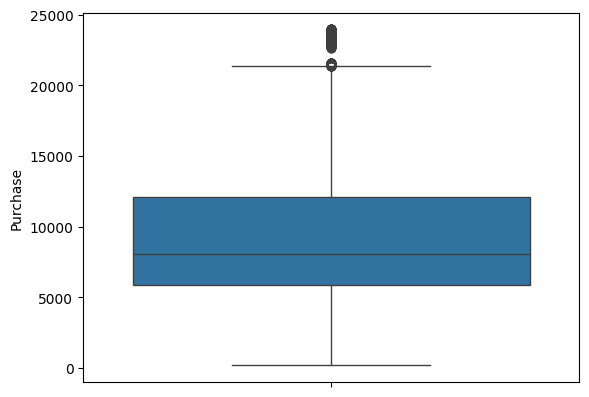

In [ ]:
#checking out for outliers:

sns.boxplot(df['Purchase'])

<Axes: ylabel='Age'>

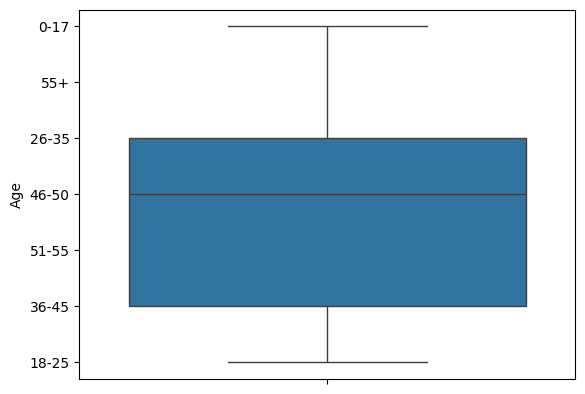

In [ ]:
sns.boxplot(df['Age'])

<Axes: ylabel='Occupation'>

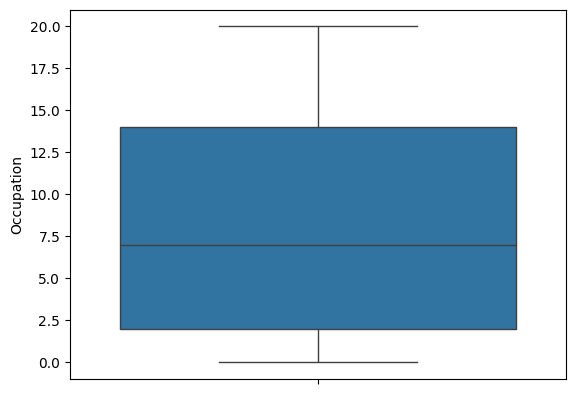

In [ ]:
sns.boxplot(df['Occupation'])

<Axes: ylabel='Product_Category'>

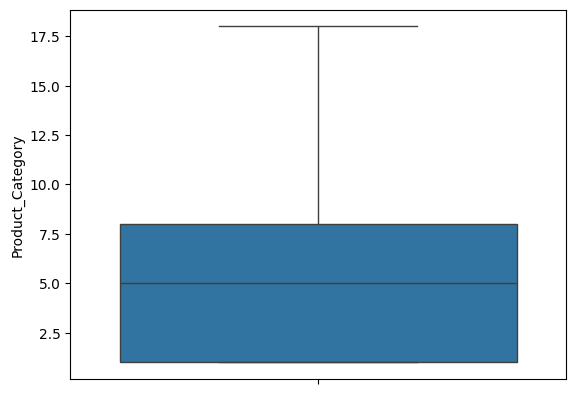

In [ ]:
sns.boxplot(df['Product_Category'])

In [ ]:
#clipping the purchase data

df['remove_purchase'] = np.clip(df['Purchase'],np.percentile(df['Purchase'],5),np.percentile(df['Purchase'],95))
df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return bound(*args, **kwds)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,remove_purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
350610,1006010,P00058642,M,36-45,0.0,C,1,0.0,18.0,3146.0,3146.0
350611,1006010,P00148742,M,36-45,0.0,C,1,0.0,8.0,7975.0,7975.0
350612,1006011,P0097242,M,36-45,15.0,C,3,0.0,1.0,19547.0,19547.0
350613,1006011,P00182742,M,36-45,15.0,C,3,0.0,1.0,11579.0,11579.0


**Exploring Data**

Univariate Analysis


<Axes: xlabel='remove_purchase', ylabel='Count'>

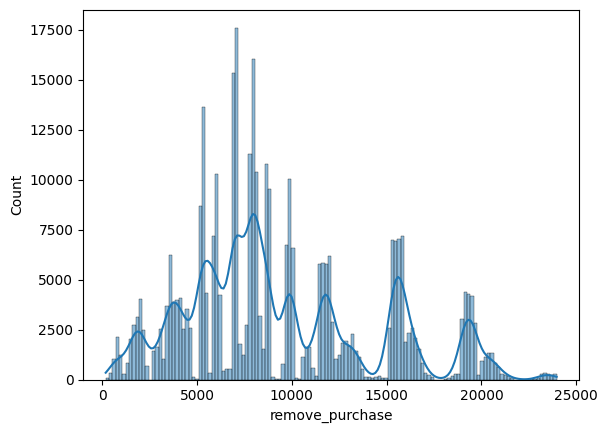

In [ ]:
sns.histplot(x='remove_purchase',data=df,kde=True)

We can see purchase value between 5000 and 10000 have higher count.


>

<Axes: xlabel='Marital_Status', ylabel='count'>

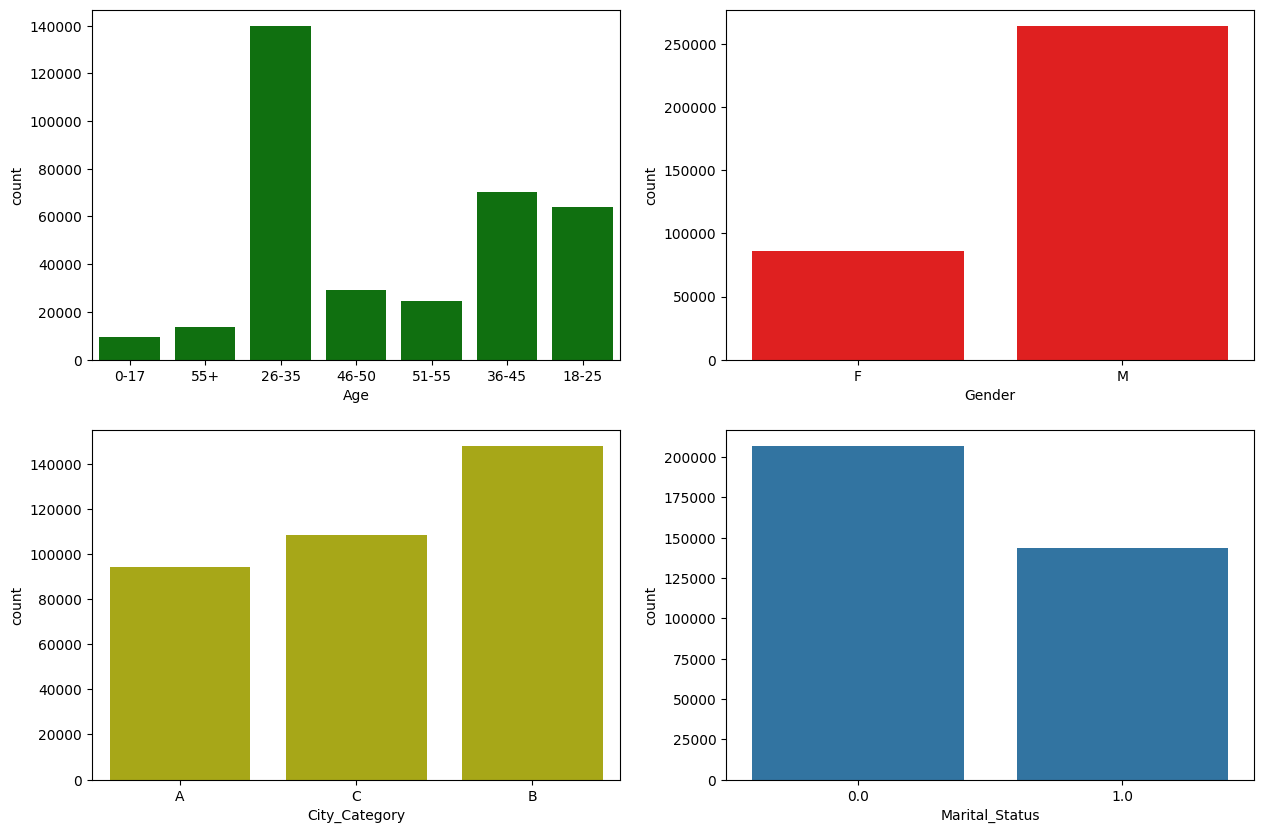

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x='Age',data=df,ax=axs[0,0],color='g')
sns.countplot(x='Gender',data=df,ax=axs[0,1],color='r')
sns.countplot(x='City_Category',data=df,ax=axs[1,0],color='y')
sns.countplot(x='Marital_Status',data=df,ax=axs[1,1])

1. We can clearly see from the graphs above the purchases done by males are much higher than females.
2.People of age 26-30 are the target customers.
3. The purchases are highest from City category B.
4. Single customer purchases are higher than married users.


<Axes: xlabel='Occupation', ylabel='count'>

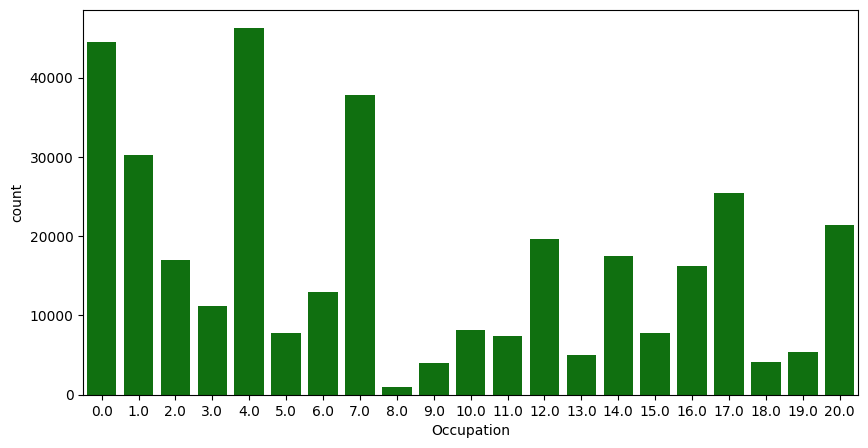

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Occupation',data=df,color='g')


We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.


<Axes: xlabel='Product_Category', ylabel='count'>

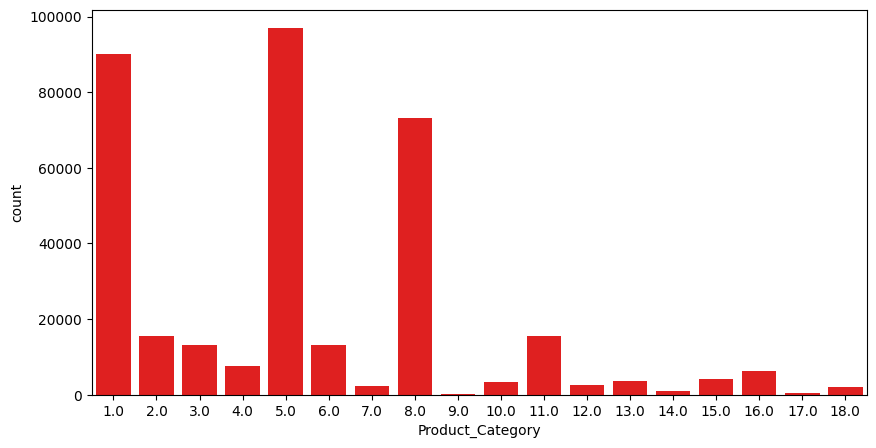

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Product_Category',data=df,color='r')



1. There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.

<Axes: xlabel='Marital_Status', ylabel='remove_purchase'>

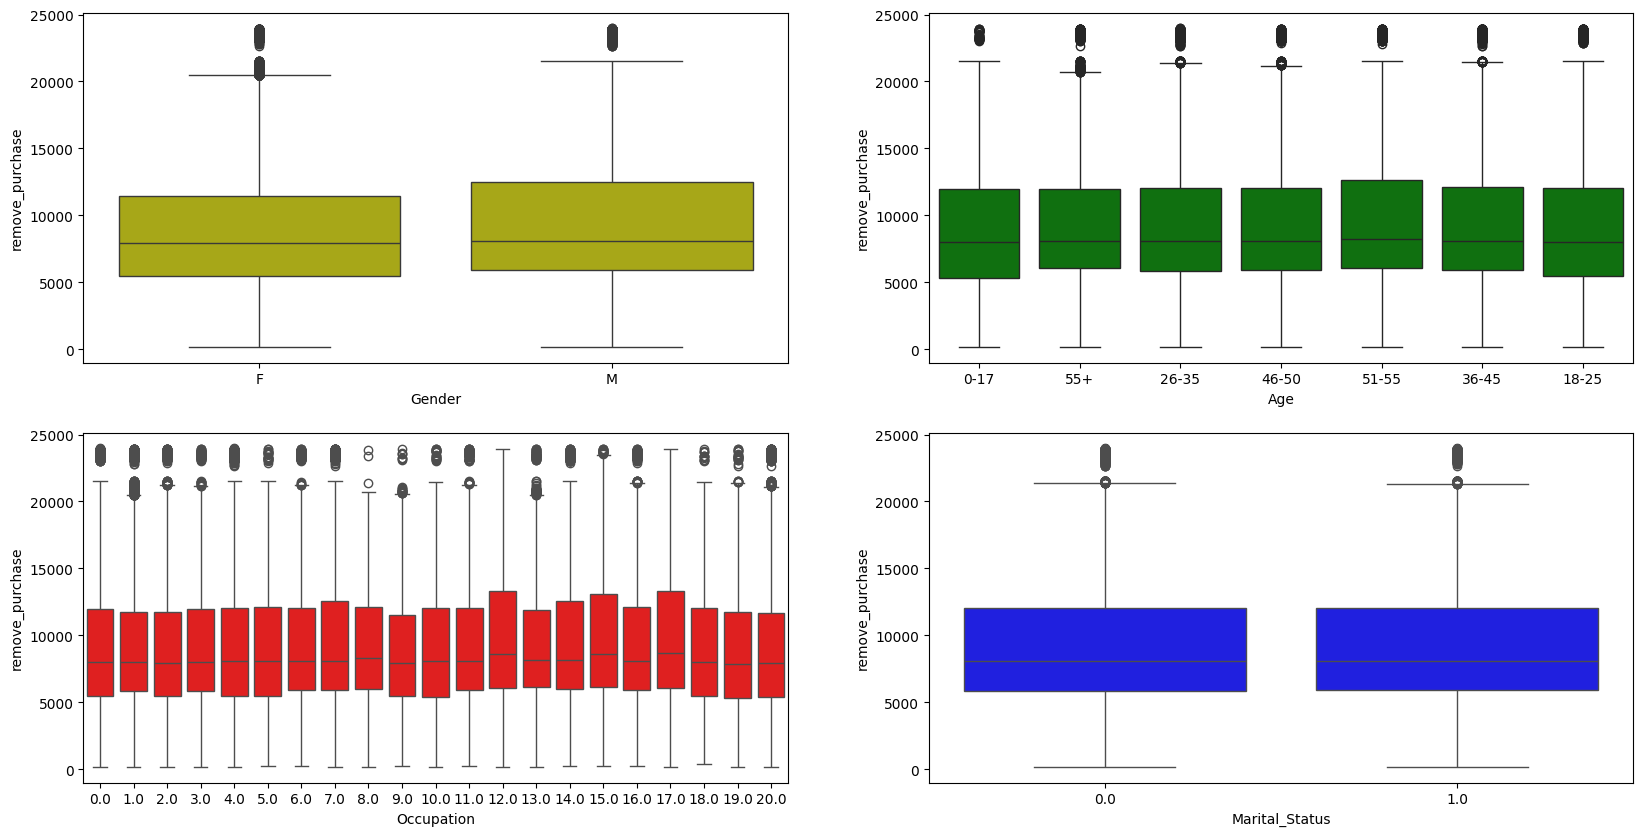

In [ ]:
#Bivariate Analysis
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.boxplot(x='Gender',y='remove_purchase',data=df,ax=axs[0,0],color='y')
sns.boxplot(x='Age',y='remove_purchase',data=df,ax=axs[0,1],color='g')
sns.boxplot(x='Occupation',y='remove_purchase',data=df,ax=axs[1,0],color='r')
sns.boxplot(x='Marital_Status',y='remove_purchase',data=df,ax=axs[1,1],color='b')

Text(0.5, 1.0, 'Female Spending ')

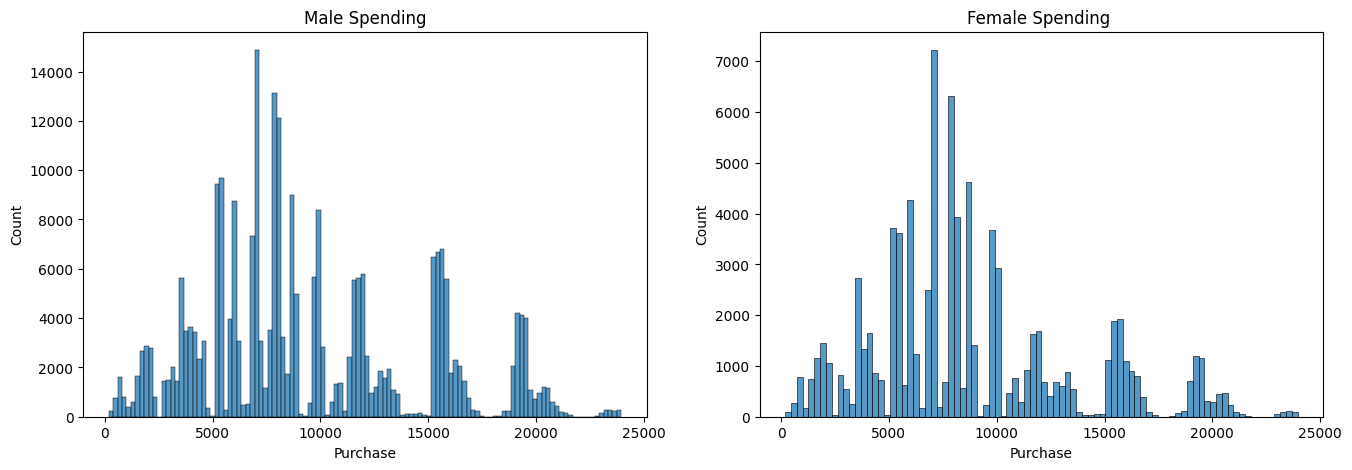

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Purchase'], ax=axs[0]).set_title("Male Spending")
sns.histplot(data=df[df['Gender']=='F']['Purchase'], ax=axs[1]).set_title("Female Spending ")


From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males

<Axes: xlabel='Product_Category', ylabel='Count'>

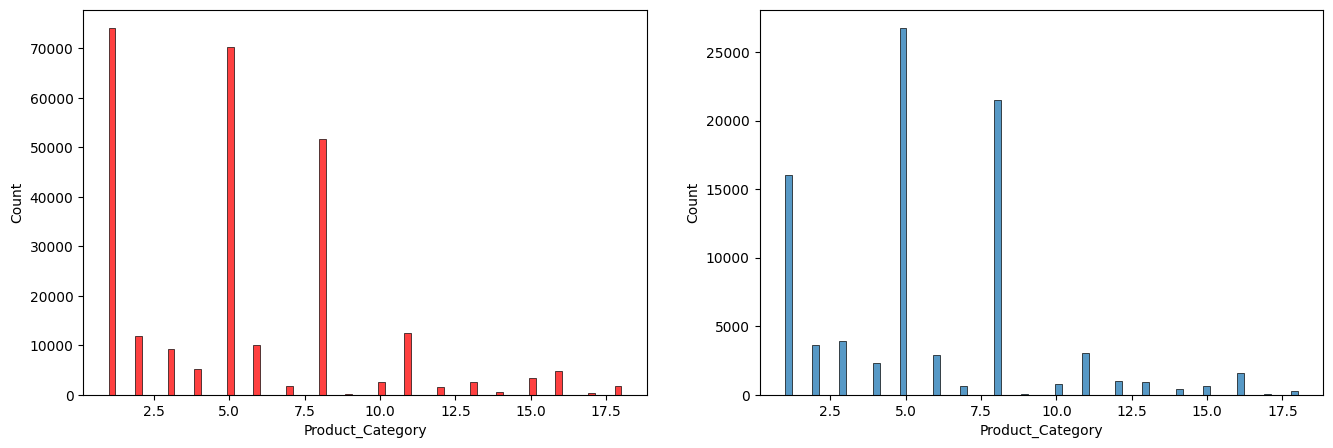

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=df[df['Gender']=='M']['Product_Category'], ax=axs[0],color='r')
sns.histplot(data=df[df['Gender']=='F']['Product_Category'], ax=axs[1])

>The product catergory purchased more by male and female by 5.0.

**MultiVariate Analysis**

<Axes: xlabel='Product_Category', ylabel='remove_purchase'>

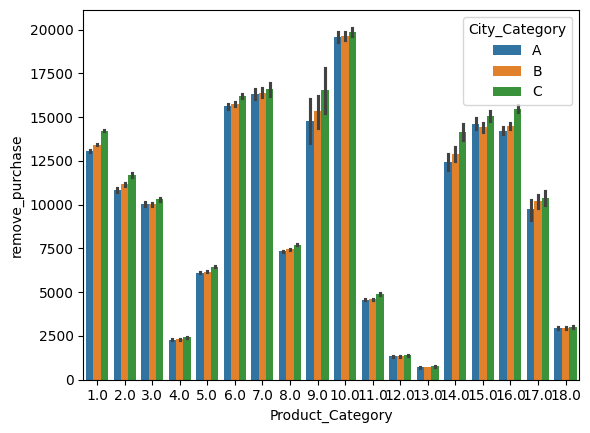

In [ ]:
sns.barplot(x='Product_Category',y='remove_purchase',hue='City_Category',data=df)


<ipython-input-44-1e775e36342f>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:hotpink'` for the same effect.

  sns.barplot(x='Age',y='remove_purchase',hue='Marital_Status',data=df,color='hotpink')


<Axes: xlabel='Age', ylabel='remove_purchase'>

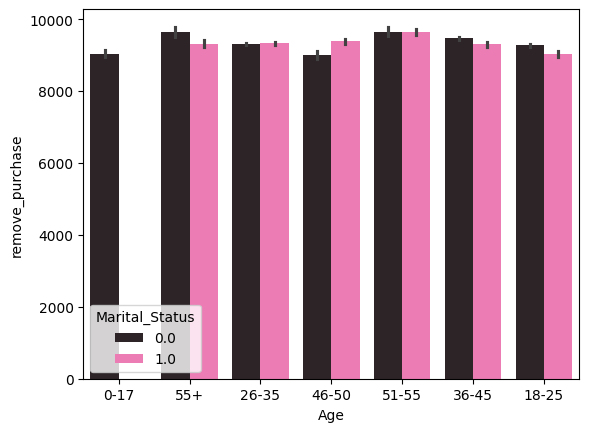

In [ ]:
sns.barplot(x='Age',y='remove_purchase',hue='Marital_Status',data=df,color='hotpink')

<Axes: xlabel='Age', ylabel='remove_purchase'>

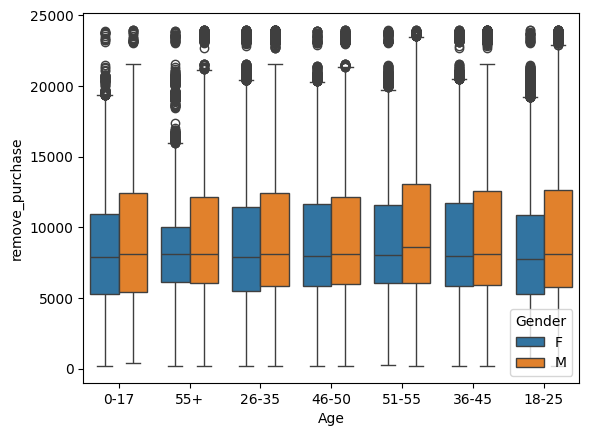

In [ ]:
sns.boxplot(x='Age',y='remove_purchase',hue='Gender',data=df)

In [ ]:
#average amount spent per gender.
avg_spend=df.groupby(['User_ID','Gender'])['Purchase'].mean()
avg_spend.reset_index()

,User_ID,Gender,Purchase
0,1000001,F,9676.764706
1,1000002,M,10375.541667
2,1000003,M,14445.375000
3,1000004,M,14929.333333
4,1000005,M,8096.676471
...,...,...,...
5883,1006036,F,7506.494565
5884,1006037,F,10065.891304
5885,1006038,F,6130.000000
5886,1006039,F,7354.600000


In [ ]:
avgamt_gender = df.groupby(['User_ID', 'Gender'])[['Purchase']].sum()
avgamt_gender = avgamt_gender.reset_index()
avgamt_gender



,User_ID,Gender,Purchase
0,1000001,F,334093
1,1000002,M,810472
2,1000003,M,341635
3,1000004,M,206468
4,1000005,M,821001
...,...,...,...
5886,1006036,F,4116058
5887,1006037,F,1119538
5888,1006038,F,90034
5889,1006039,F,590319


<Axes: xlabel='Purchase', ylabel='Count'>

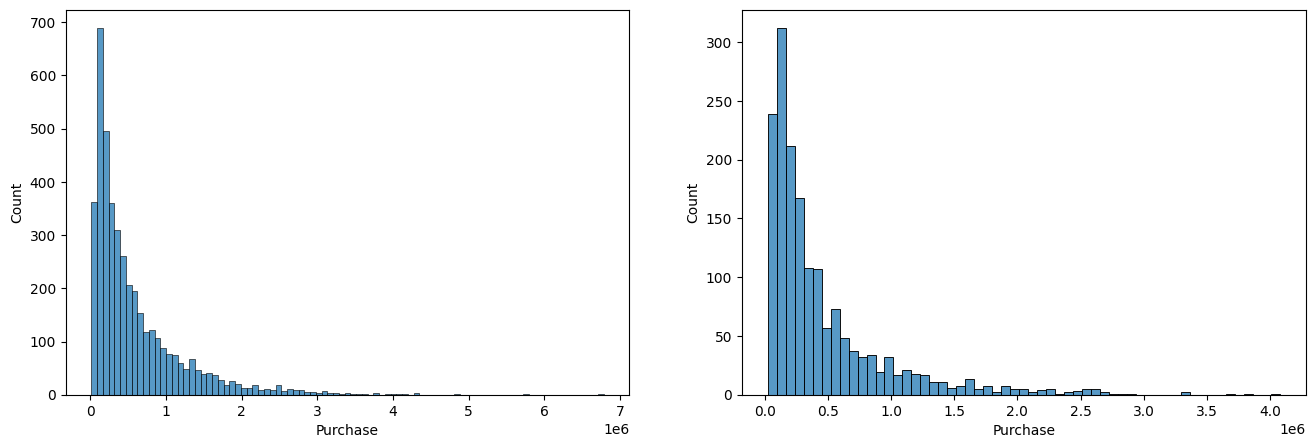

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='M']['Purchase'], ax=axs[0])
sns.histplot(data=avgamt_gender[avgamt_gender['Gender']=='F']['Purchase'], ax=axs[1])

1. Average amount spend by males are higher than females.

In [ ]:
avgamt_gender.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,712024.394958
M,925344.402367


In [ ]:
avgamt_gender.groupby(['Gender'])[['Purchase']].sum()

,Purchase
Gender,
F,1186232642
M,3909580100


The average purchase for male is greater than female.

In [ ]:
avgamt_male = avgamt_gender[avgamt_gender['Gender']=='M']
avgamt_female = avgamt_gender[avgamt_gender['Gender']=='F']

In [ ]:
##Finding the sample(sample size=300) for avg purchase amount for males and females

genders = ["M", "F"]

sample_size = 300

num_repitions = 1000

male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)


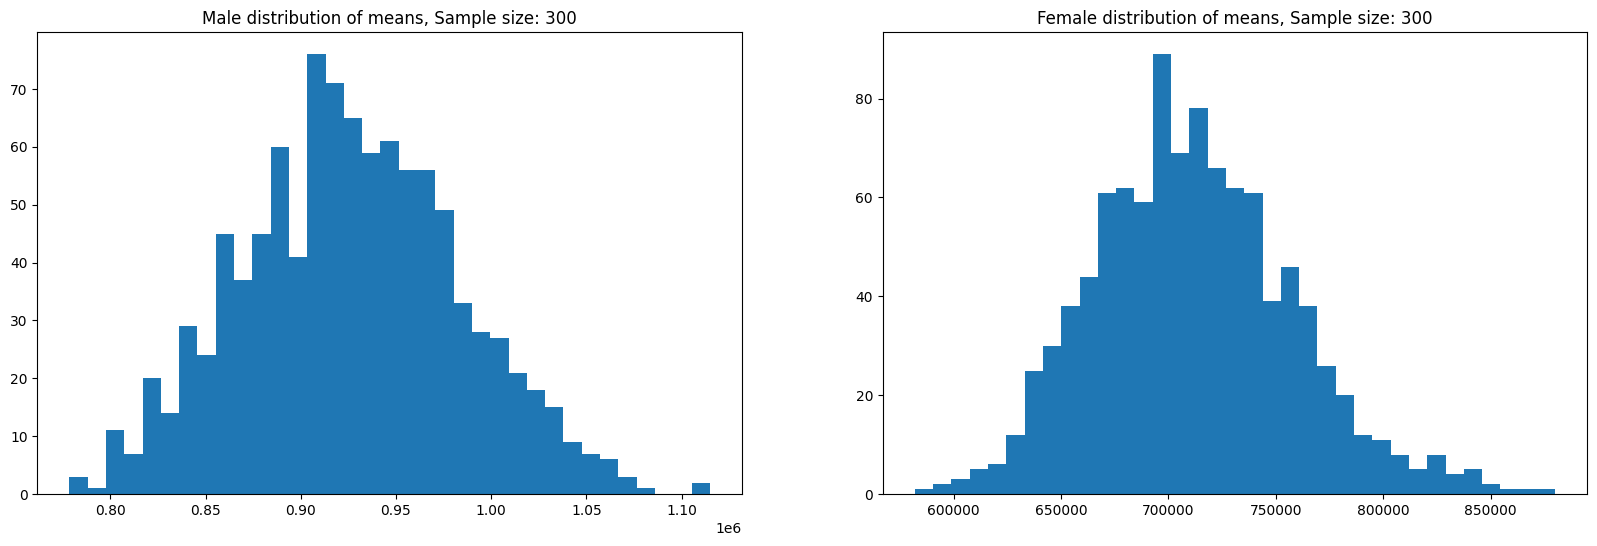

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 300")
axis[1].set_title("Female distribution of means, Sample size: 300")

plt.show()

The mean sample is normally distributed amongst, the male and female.

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(300)
sample_std_error_female=sample_std_female/np.sqrt(300)


Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

male_mean_confidence_interval = (Lower_Limit_male, Upper_Limit_male)
female_mean_confidence_interval = (Lower_Limit_female, Upper_Limit_female)

print(f"Male mean confidence interval: {male_mean_confidence_interval}")
print(f"Female mean confidence interval: {female_mean_confidence_interval}")

Male mean confidence interval: (919864.7786974198, 932835.4110492467)
Female mean confidence interval: (706396.5779926213, 716893.6389940453)


In [ ]:
##Finding the sample(sample size=3000) for avg purchase amount for males and females

genders = ["M", "F"]

sample_size = 3000

num_repitions = 1000

male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)


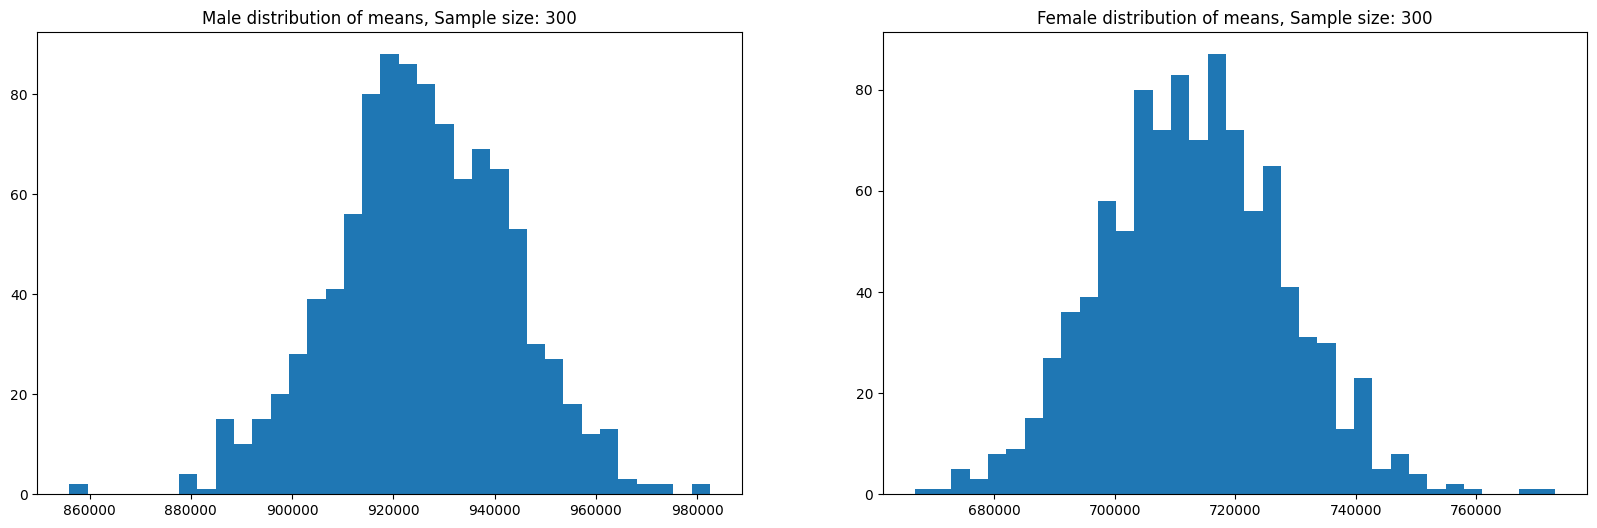

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 300")
axis[1].set_title("Female distribution of means, Sample size: 300")

plt.show()

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(3000)
sample_std_error_female=sample_std_female/np.sqrt(3000)


Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

male_mean_confidence_interval = (Lower_Limit_male, Upper_Limit_male)
female_mean_confidence_interval = (Lower_Limit_female, Upper_Limit_female)

print(f"Male mean confidence interval: {male_mean_confidence_interval}")
print(f"Female mean confidence interval: {female_mean_confidence_interval}")

Male mean confidence interval: (925054.9336144301, 926305.4885355699)
Female mean confidence interval: (712570.6205266545, 713651.160814012)


In [ ]:
##Finding the sample(sample size=30000) for avg purchase amount for males and females


genders = ["M", "F"]

sample_size = 30000

num_repitions = 1000

male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()

    male_means.append(male_mean)
    female_means.append(female_mean)

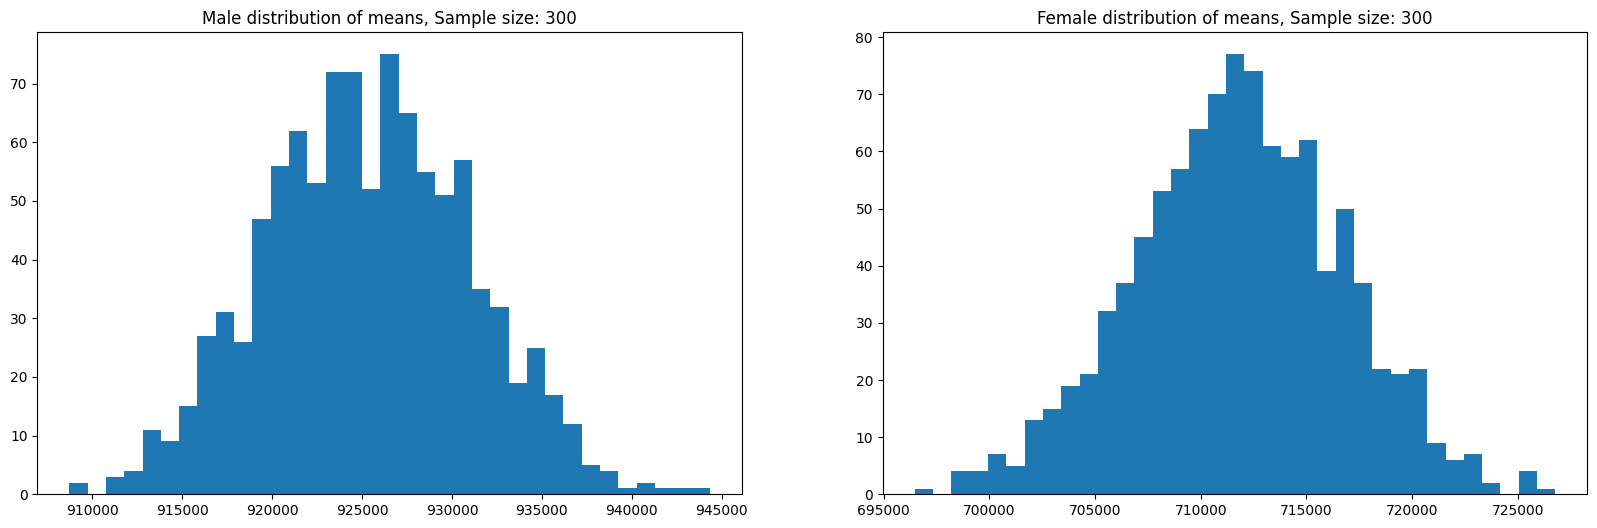

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
axis[0].hist(male_means, bins=35)
axis[1].hist(female_means, bins=35)
axis[0].set_title("Male distribution of means, Sample size: 300")
axis[1].set_title("Female distribution of means, Sample size: 300")

plt.show()

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_male = np.mean(male_means)
sample_mean_female = np.mean(female_means)

sample_std_male=pd.Series(male_means).std()
sample_std_female=pd.Series(female_means).std()

sample_std_error_male=sample_std_male/np.sqrt(30000)
sample_std_error_female=sample_std_female/np.sqrt(30000)


Upper_Limit_male=z95*sample_std_error_male + sample_mean_male
Lower_Limit_male=sample_mean_male - z95*sample_std_error_male

Upper_Limit_female=z95*sample_std_error_female + sample_mean_female
Lower_Limit_female=sample_mean_female - z95*sample_std_error_female

male_mean_confidence_interval = (Lower_Limit_male, Upper_Limit_male)
female_mean_confidence_interval = (Lower_Limit_female, Upper_Limit_female)

print(f"Male mean confidence interval: {male_mean_confidence_interval}")
print(f"Female mean confidence interval: {female_mean_confidence_interval}")

Male mean confidence interval: (925265.8635240529, 925395.1414249471)
Female mean confidence interval: (711708.5744990365, 711819.5586452967)


1.By increasing the sample size we can see confidence interval is more closer to the population mean.


2.sample size affect the shape of the distributions of the mean, as the deviation becomes lesser.

In [ ]:
#How does Marital_Status affect the amount spent?

avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()
avg_Marital

avg_Single = avg_Marital[avg_Marital['Marital_Status']==0]
avg_Married = avg_Marital[avg_Marital['Marital_Status']==1]

sample_size = 300
num_repitions = 1000
married_means = []
single_means = []


for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)

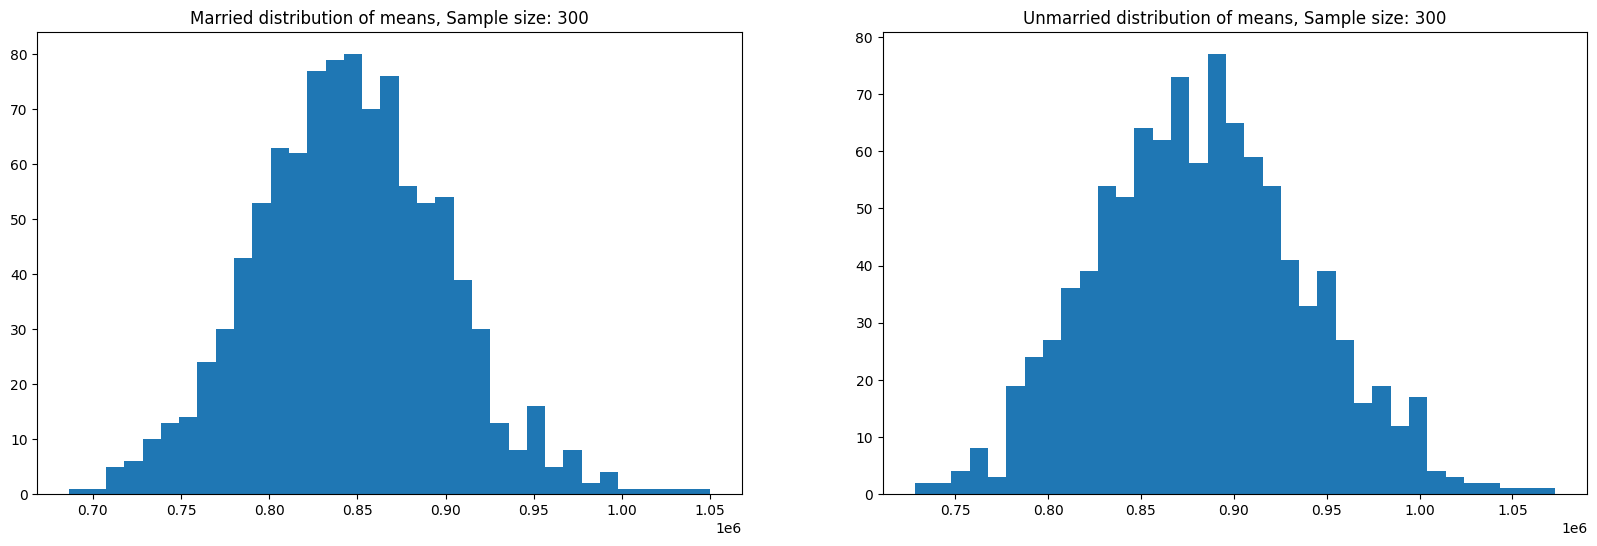

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35)
axis[1].hist(single_means, bins=35)
axis[0].set_title("Married distribution of means, Sample size: 300")
axis[1].set_title("Unmarried distribution of means, Sample size: 300")

plt.show()

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(300)
sample_std_error_single=sample_std_single/np.sqrt(300)


Upper_Limit_married=z95*sample_std_error_married + sample_mean_married
Lower_Limit_maried=sample_std_error_married - z95*sample_mean_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_mean_single-z95*sample_std_error_single

married_mean_confidence_interval = (Upper_Limit_married,Lower_Limit_maried)
single_mean_confidence_interval = (Upper_Limit_single,Lower_Limit_single)

print(f"Married mean confidence interval: {married_mean_confidence_interval}")
print(f"Single mean confidence interval: {single_mean_confidence_interval}")

Married mean confidence interval: (851912.2153669976, -1654661.9030725004)
Single mean confidence interval: (9639.00085782565, -3126.1624403758865)


In [ ]:

avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()
avg_Marital

avg_Single = avg_Marital[avg_Marital['Marital_Status']==0]
avg_Married = avg_Marital[avg_Marital['Marital_Status']==1]

sample_size = 3000
num_repitions = 1000
married_means = []
single_means = []


for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)

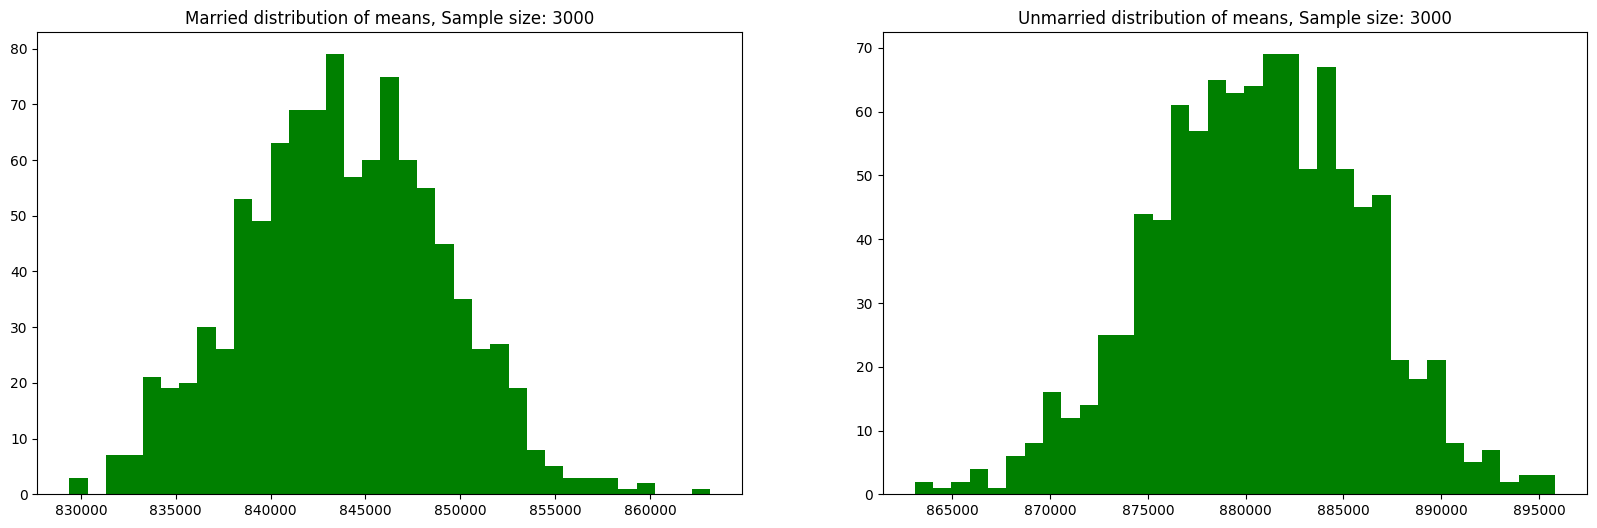

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35,color='g')
axis[1].hist(single_means, bins=35,color='g')
axis[0].set_title("Married distribution of means, Sample size: 3000")
axis[1].set_title("Unmarried distribution of means, Sample size: 3000")

plt.show()

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(3000)
sample_std_error_single=sample_std_single/np.sqrt(3000)


Upper_Limit_married=z95*sample_std_error_married + sample_mean_married
Lower_Limit_maried=sample_std_error_married - z95*sample_mean_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_std_error_single - z95*sample_mean_single

married_mean_confidence_interval = (Upper_Limit_married,Lower_Limit_maried)
single_mean_confidence_interval = (Upper_Limit_single,Lower_Limit_single)

print(f"Married confidence interval: {married_mean_confidence_interval}")
print(f"Single confidence interval: {single_mean_confidence_interval}")

Married confidence interval: (232295.96911846125, -455167.9551195727)
Single confidence interval: (242475.11046420064, -475114.89889768173)


CI's of male and female do not overlap and upper limits of female purchase CI are lesser than lower limits of male purchase CI. This proves that men usually spend more than women (NOTE: as per data 77% contibutions are from men and only 23% purchases are from women).

The reason for less purchase by women could have several factors:

  Males might be doing the purchase for females.
  Salary can be a factor in less purchase.
  We also need to see whether male-based products were sold more than women-based products to clearly identify difference in spending pattern.
  If the female based products quality/quantity needs to be improved for women purchasing.


In [ ]:
avg_Marital = df.groupby(['User_ID', 'Marital_Status'])[['Purchase']].sum()
avg_Marital = avg_Marital.reset_index()
avg_Marital

avg_Single = avg_Marital[avg_Marital['Marital_Status']==0]
avg_Married = avg_Marital[avg_Marital['Marital_Status']==1]

sample_size = 30000
num_repitions = 1000
married_means = []
single_means = []


for i in range(num_repitions):
    avg_married = avg_Marital[avg_Marital['Marital_Status']==1].sample(sample_size, replace=True)['Purchase'].mean()
    avg_single = avg_Marital[avg_Marital['Marital_Status']==0].sample(sample_size, replace=True)['Purchase'].mean()

    married_means.append(avg_married)
    single_means.append(avg_single)

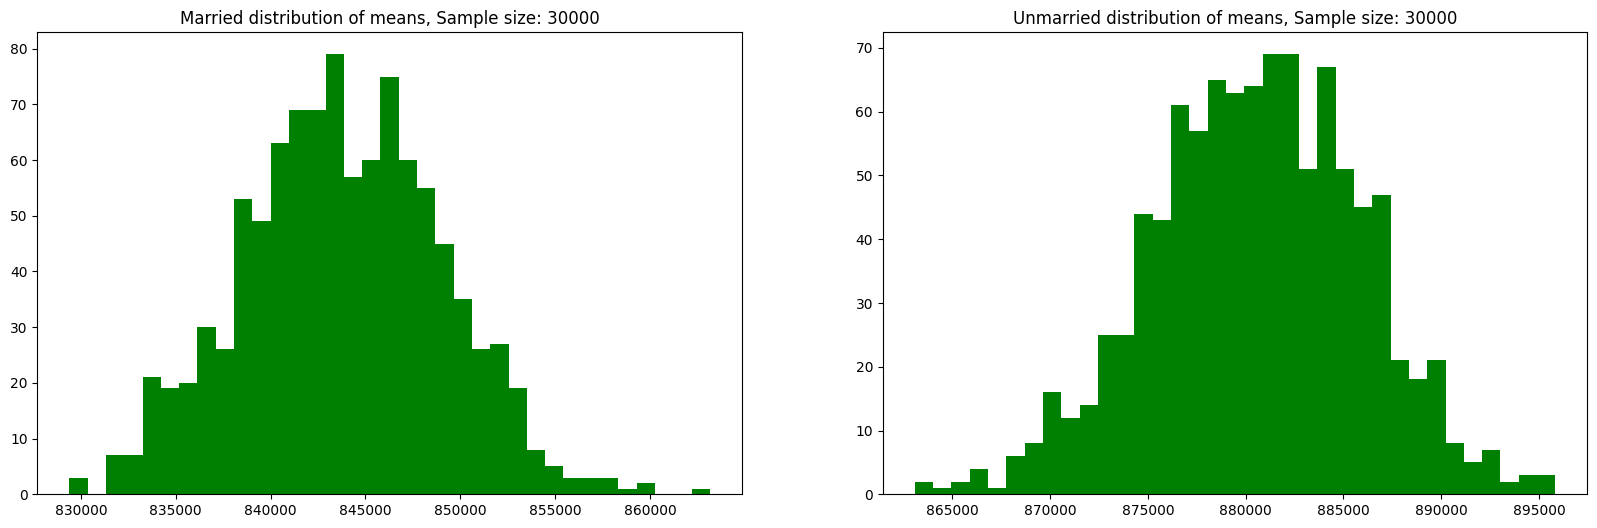

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

axis[0].hist(married_means, bins=35,color='g')
axis[1].hist(single_means, bins=35,color='g')
axis[0].set_title("Married distribution of means, Sample size: 30000")
axis[1].set_title("Unmarried distribution of means, Sample size: 30000")

plt.show()


The means sample seems to be normally distributed for both married and singles. Also, we can see the mean of the sample means are closer to the population mean as per central limit theorem.

In [ ]:
z95=1.960
#95% Confidence Interval

sample_mean_married = np.mean(married_means)
sample_mean_single = np.mean(single_means)

sample_std_married=pd.Series(married_means).std()
sample_std_single=pd.Series(single_means).std()

sample_std_error_married=sample_std_married/np.sqrt(30000)
sample_std_error_single=sample_std_single/np.sqrt(30000)


Upper_Limit_married=z95*sample_std_error_married + sample_mean_married
Lower_Limit_maried=sample_std_error_married - z95*sample_mean_married

Upper_Limit_single=z95*sample_std_error_single + sample_mean_single
Lower_Limit_single=sample_std_error_single - z95*sample_mean_single

married_mean_confidence_interval = (Upper_Limit_married,Lower_Limit_maried)
single_mean_confidence_interval = (Upper_Limit_single,Lower_Limit_single)

print(f"Married mean confidence interval: {married_mean_confidence_interval}")
print(f"Single mean confidence interval: {single_mean_confidence_interval}")

Married mean confidence interval: (232259.39050543684, -455186.6176772382)
Single mean confidence interval: (242437.3766595789, -475134.15083881526)


The average spending of married and unmarried do not overlap as unmarried tend to spend more than married.


Reasons related for it could be 🇰
> Being married comes with more responsibilties so they tend to save more, and spend less on the purchases of non-necessity items.
> Products related to family and kids could be added on for longer term, which would be necessary for a family person.



In [ ]:
avgamt_age = df.groupby(['User_ID', 'Age'])[['Purchase']].sum()
avgamt_age = avgamt_age.reset_index()

avgamt_age['Age'].value_counts()

Age
26-35    2049
36-45    1163
18-25    1064
46-50     529
51-55     480
55+       370
0-17      218
Name: count, dtype: int64

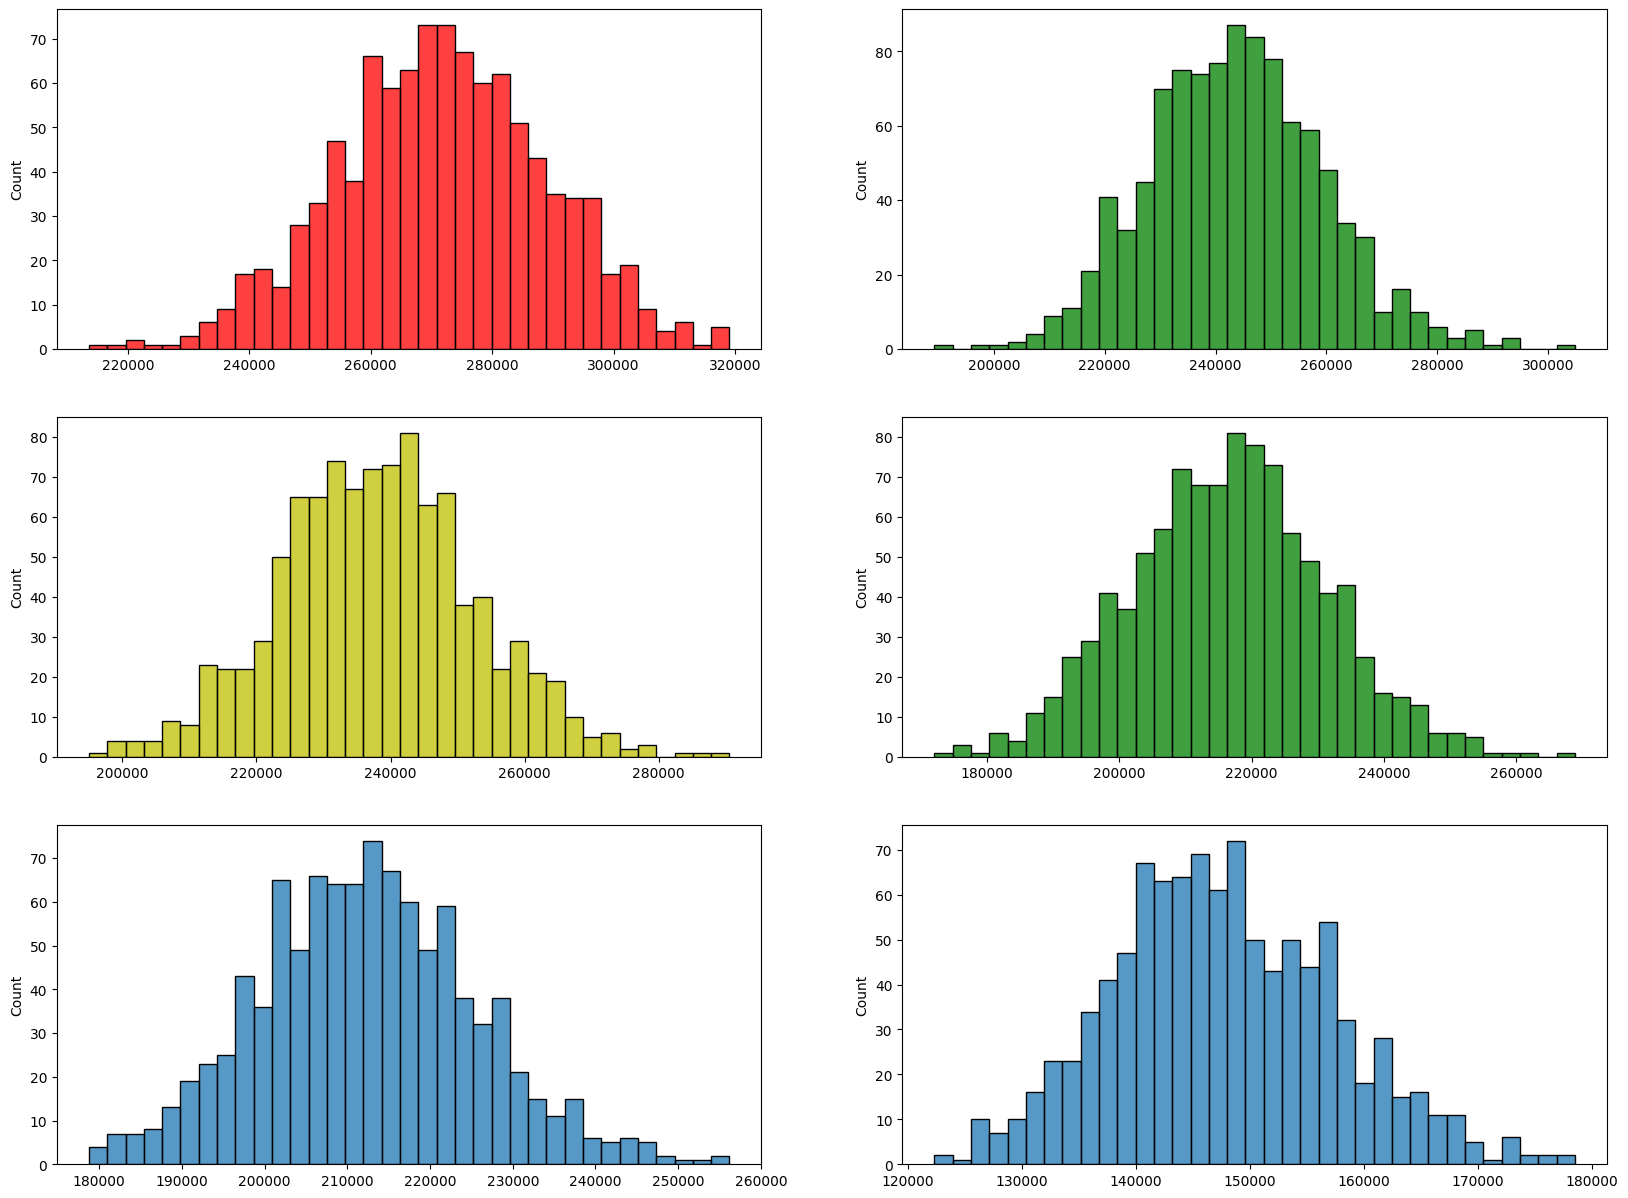

In [ ]:
#How does Age affect the amount spent?

sample_size = 300
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0],color='r')
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1],color='g')
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0],color='y')
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1],color='g')
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()



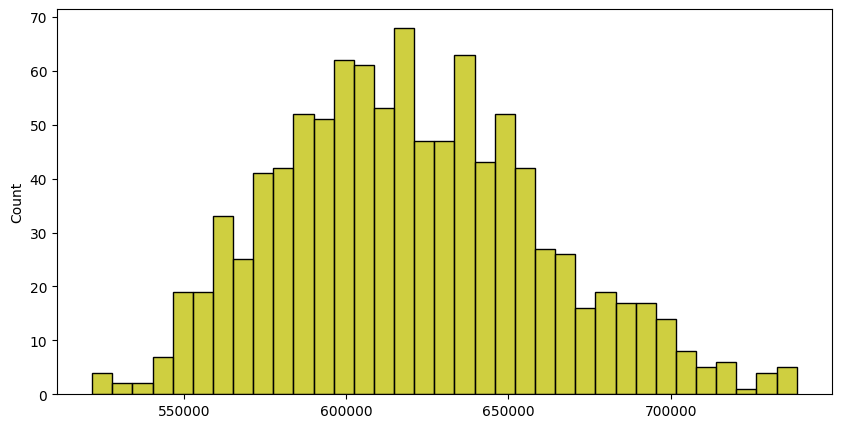

In [ ]:

plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35,color='y')
plt.show()


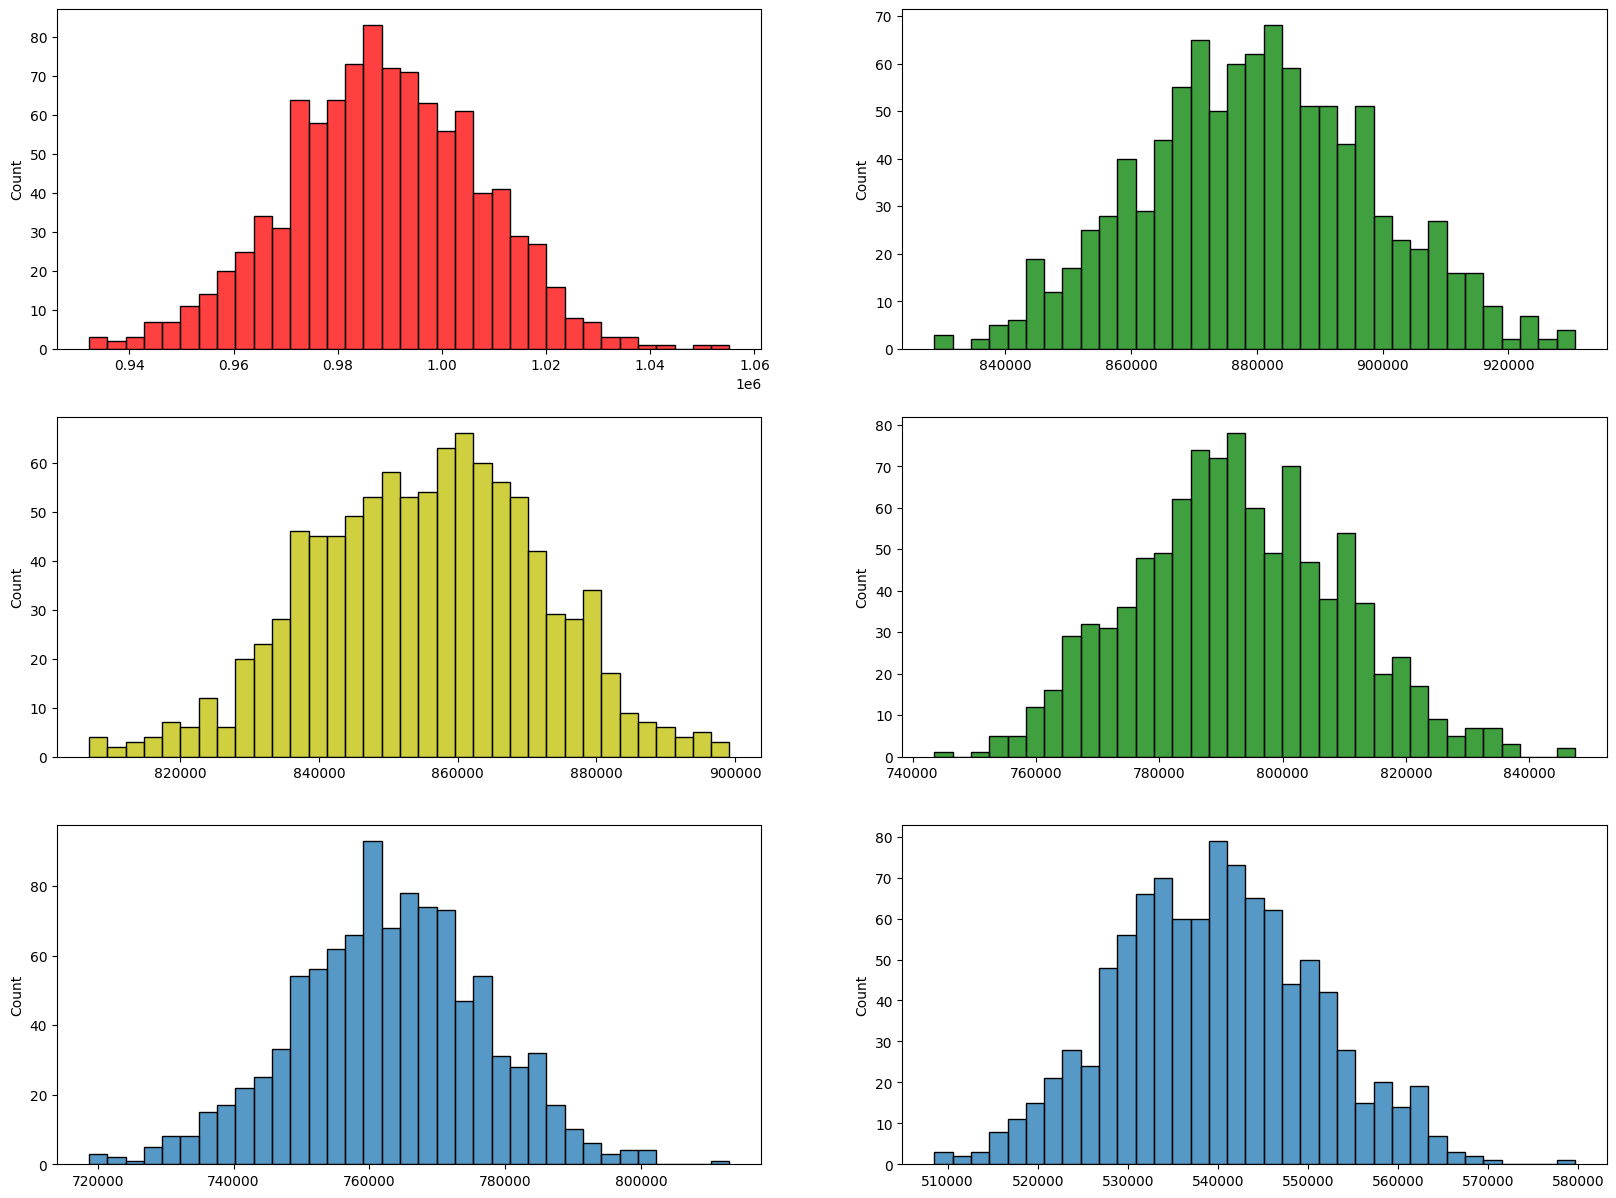

In [ ]:

sample_size = 3000
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0],color='r')
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1],color='g')
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0],color='y')
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1],color='g')
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

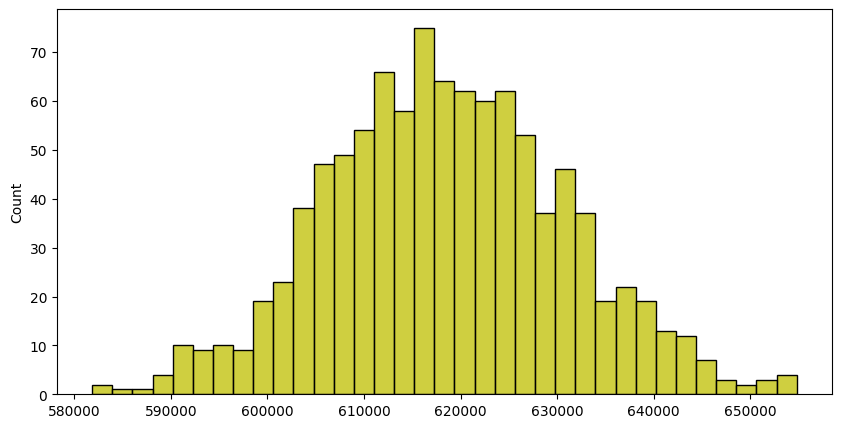

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35,color='y')
plt.show()

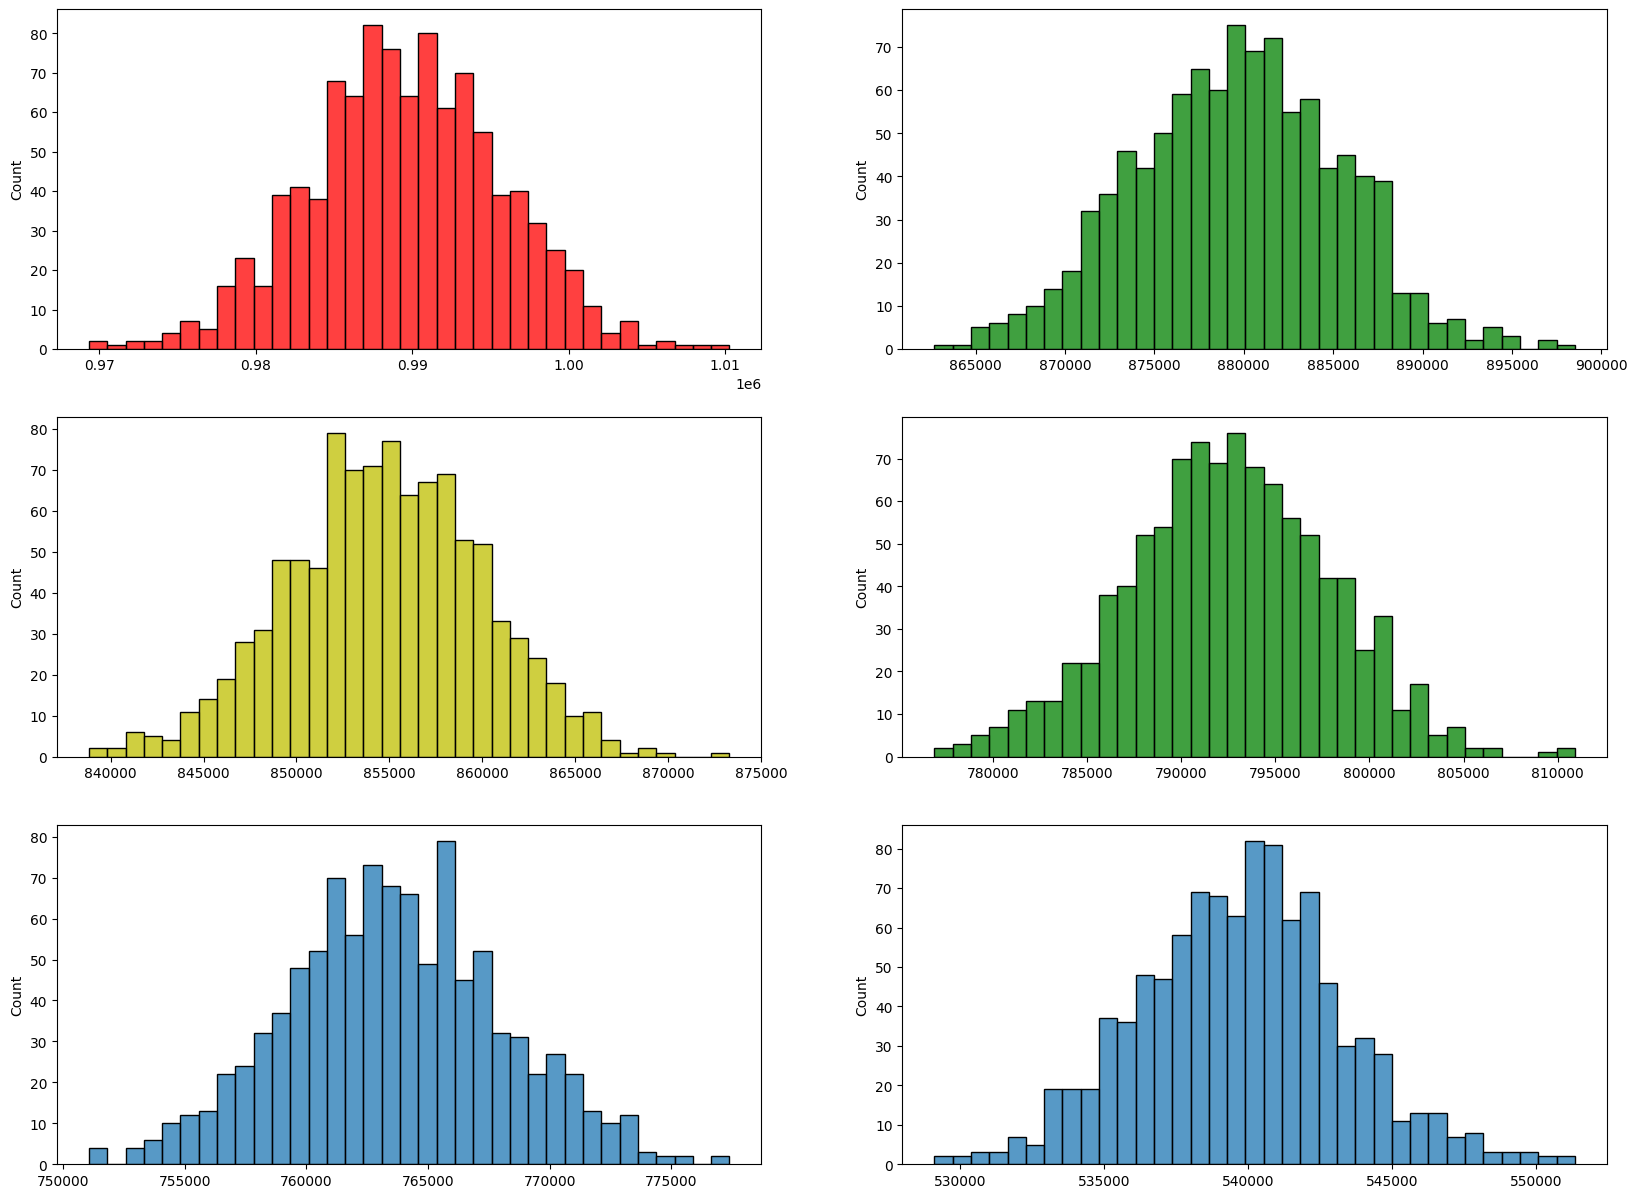

In [ ]:
sample_size = 30000
num_repitions = 1000

all_sample_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_sample_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):

        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_sample_means[i].append(mean)



fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

sns.histplot(all_sample_means['26-35'],bins=35,ax=axis[0,0],color='r')
sns.histplot(all_sample_means['36-45'],bins=35,ax=axis[0,1],color='g')
sns.histplot(all_sample_means['18-25'],bins=35,ax=axis[1,0],color='y')
sns.histplot(all_sample_means['46-50'],bins=35,ax=axis[1,1],color='g')
sns.histplot(all_sample_means['51-55'],bins=35,ax=axis[2,0])
sns.histplot(all_sample_means['55+'],bins=35,ax=axis[2,1])

plt.show()

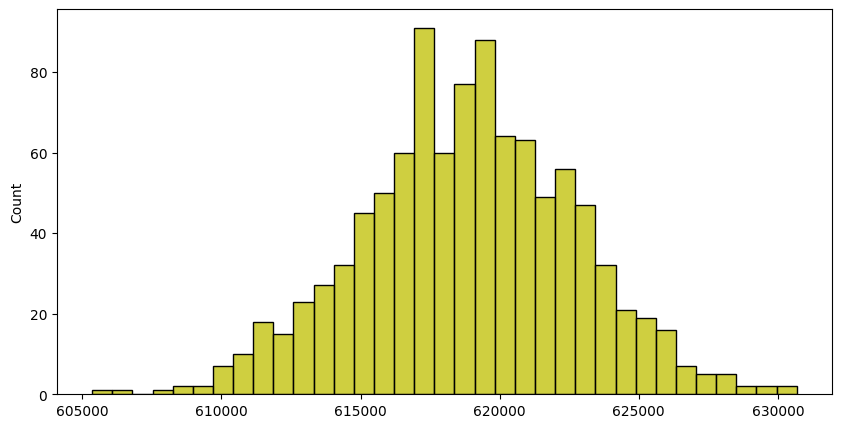

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(all_sample_means['0-17'],bins=35,color='y')
plt.show()

In [ ]:

z95=1.960 #95% Confidence Interval

sample_size = 300
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error


    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [ ]:
z95=1.960 #95% Confidence Interval

sample_size = 3000
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error


    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (945034.42, 1034284.21)
For age 36-45 confidence interval of means: (823347.80, 935983.62)
For age 18-25 confidence interval of means: (801632.78, 908093.46)
For age 46-50 confidence interval of means: (713505.63, 871591.93)
For age 51-55 confidence interval of means: (692392.43, 834009.42)
For age 55+ confidence interval of means: (476948.26, 602446.23)
For age 0-17 confidence interval of means: (527662.46, 710073.17)


In [ ]:
z95=1.960 #95% Confidence Interval

sample_size = 30000
num_repitions = 1000

all_means = {}

age_intervals = ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']
for i in age_intervals:
    all_means[i] = []

for i in age_intervals:
    for j in range(num_repitions):
        mean = avgamt_age[avgamt_age['Age']==i].sample(sample_size, replace=True)['Purchase'].mean()
        all_means[i].append(mean)
for val in ['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17']:

    new_df = avgamt_age[avgamt_age['Age']==val]

    std_error = z95*new_df['Purchase'].std()/np.sqrt(len(new_df))
    sample_mean = new_df['Purchase'].mean()
    lower_lim = sample_mean - std_error
    upper_lim = sample_mean + std_error


    print("For age {} confidence interval of means: ({:.2f}, {:.2f})".format(val, lower_lim, upper_lim))

For age 26-35 confidence interval of means: (257971.64, 282961.38)
For age 36-45 confidence interval of means: (227753.41, 259944.69)
For age 18-25 confidence interval of means: (222298.69, 252945.78)
For age 46-50 confidence interval of means: (194060.50, 237897.79)
For age 51-55 confidence interval of means: (191559.63, 232925.94)
For age 55+ confidence interval of means: (130190.35, 164970.68)
For age 0-17 confidence interval of means: (144841.01, 197529.27)


Insights:


1. The age group 26-35 has the highest confidence interval range, suggesting that this age group might have the highest average of the measured variable.


2. Lowest Mean Range: The age group 55+ has the lowest confidence interval range, indicating that this age group has the lowest average of the measured variable

3. Variability: The width of the confidence interval can give insight into variability. For instance, the 0-17 and 55+ age groups have relatively wide intervals, suggesting more variability in the data within these groups.

Recommendations :



1. Men spent more money than women, company can focus on retaining the male customers and getting more male customers.

2. Product_Category - 1, 5, 8 have highest purchasing frequency. it means these are the products in these categories are in more demand. Company can focus on selling more of these products.

3. Unmarried customers spend more money than married customers, So company should focus on acquisition of Unmarried customers.

4. Customers in the age 26-35 spend more money than the others, So company should focus on acquisition of customers who are in the age 26-35.

5. We have more customers aged 26-35 in the city category B and A, company can focus more on these customers for these cities to increase the business.

6. Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.

7. Some of the Product category like 19,20,13 have very less purchase. Company can think of dropping it.

8. The top 10 users who have purchased more company should give more offers and discounts so that they can be retained and can be helpful for companies business.

9. The occupation which are contributing more company can think of offering credit cards or other benefits to those customers by liasing with some financial partners to increase the sales.

10. The top products should be given focus in order to maintain the quality in order to further increase the sales of those products.

11. People who are staying in city for an year have contributed to 35% of the total purchase amount. Company can focus on such customer base who are neither too old nor too new residents in the city.

12. We have highest frequency of purchase order between 5k and 10k, company can focus more on these mid range products to increase the sales.